# TensorFlow Classification

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [8]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
!pip install tensorflow

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
import tensorflow as tf

C:\Users\Ancha Harika\Anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ancha Harika\Anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ancha Harika\Anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ancha Harika\Ana

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting Continuous to Categorical

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

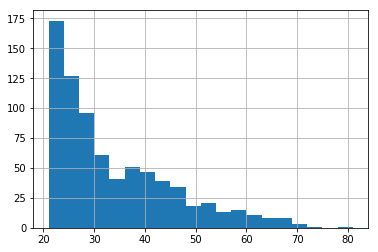

In [14]:
diabetes['Age'].hist(bins=20)

In [15]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

### Putting them together

In [16]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [17]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [19]:
x_data = diabetes.drop('Class',axis=1)

In [20]:
labels = diabetes['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Function

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Creating the Model

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_model_dir': 'C:\\Users\\ANCHAH~1\\AppData\\Local\\Temp\\tmpztutpco_', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_save_summary_steps': 100}


In [25]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ANCHAH~1\AppData\Local\Temp\tmpztutpco_\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 166.004
INFO:tensorflow:loss = 5.1408687, step = 101 (0.613 sec)
INFO:tensorflow:global_step/sec: 186.768
INFO:tensorflow:loss = 5.2408905, step = 201 (0.537 sec)
INFO:tensorflow:global_step/sec: 202.734
INFO:tensorflow:loss = 5.1250887, step = 301 (0.491 sec)
INFO:tensorflow:global_step/sec: 166.224
INFO:tensorflow:loss = 4.3624215, step = 401 (0.600 sec)
INFO:tensorflow:global_step/sec: 224.205
INFO:tensorflow:loss = 5.250782, step = 501 (0.450 sec)
INFO:tensorflow:global_step/sec: 167.823
INFO:tensorflow:loss = 5.8383236, step = 601 (0.598 sec)
INFO:tensorflow:global_step/sec: 146.714
INFO:tensorflow:loss = 3.2376204, step = 701 (0.681 sec)
INFO:tensorflow:global_step/sec: 162.891
INFO:tensorflow:loss = 3.9988294, step = 801 (0.603 sec)
INFO:tensorflow:global_s

In [26]:
# Useful link ofr your own data
# https://stackoverflow.com/questions/44664285/what-are-the-contraints-for-tensorflow-scope-names

## Evaluation

In [27]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [28]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-03-08-19:14:59
INFO:tensorflow:Restoring parameters from C:\Users\ANCHAH~1\AppData\Local\Temp\tmpztutpco_\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-03-08-19:15:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71259844, accuracy_baseline = 0.65748036, auc = 0.7855325, auc_precision_recall = 0.6299121, average_loss = 0.5402261, global_step = 1000, label/mean = 0.34251967, loss = 5.277593, prediction/mean = 0.4028955


In [29]:
results

{'accuracy': 0.71259844,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7855325,
 'auc_precision_recall': 0.6299121,
 'average_loss': 0.5402261,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.277593,
 'prediction/mean': 0.4028955}

## Predictions

In [30]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [31]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [32]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\ANCHAH~1\AppData\Local\Temp\tmpztutpco_\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5605927], dtype=float32),
  'logits': array([0.2435677], dtype=float32),
  'probabilities': array([0.43940738, 0.5605927 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6620657], dtype=float32),
  'logits': array([0.6725131], dtype=float32),
  'probabilities': array([0.33793435, 0.6620657 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.44703594], dtype=float32),
  'logits': array([-0.212654], dtype=float32),
  'probabilities': array([0.55296403, 0.4470359 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.34682286], dtype=float32),
  'logits': array([-0.6330342], dtype=float32),
  'probabilities': array([0.65317714, 0.34682286], dtype=float32)},
 {'class_ids'

# DNN Classifier

In [59]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_model_dir': 'C:\\Users\\ANCHAH~1\\AppData\\Local\\Temp\\tmpwqks0myc', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_save_summary_steps': 100}


In [60]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [61]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [62]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [63]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_model_dir': 'C:\\Users\\ANCHAH~1\\AppData\\Local\\Temp\\tmptss6xb_e', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_save_summary_steps': 100}


In [64]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ANCHAH~1\AppData\Local\Temp\tmptss6xb_e\model.ckpt.
INFO:tensorflow:loss = 9.164463, step = 1
INFO:tensorflow:global_step/sec: 181.034
INFO:tensorflow:loss = 5.282017, step = 101 (0.554 sec)
INFO:tensorflow:global_step/sec: 181.105
INFO:tensorflow:loss = 4.2577486, step = 201 (0.562 sec)
INFO:tensorflow:global_step/sec: 167.117
INFO:tensorflow:loss = 4.3001647, step = 301 (0.600 sec)
INFO:tensorflow:global_step/sec: 205.981
INFO:tensorflow:loss = 6.063581, step = 401 (0.489 sec)
INFO:tensorflow:global_step/sec: 193.225
INFO:tensorflow:loss = 7.246081, step = 501 (0.524 sec)
INFO:tensorflow:global_step/sec: 179.682
INFO:tensorflow:loss = 3.0482082, step = 601 (0.562 sec)
INFO:tensorflow:global_step/sec: 185.965
INFO:tensorflow:loss = 5.538039, step = 701 (0.523 sec)
INFO:tensorflow:global_step/sec: 207.804
INFO:tensorflow:loss = 8.532557, step = 801 (0.489 sec)
INFO:tensorflow:global_step/

In [65]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [66]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-03-08-19:25:21
INFO:tensorflow:Restoring parameters from C:\Users\ANCHAH~1\AppData\Local\Temp\tmptss6xb_e\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-03-08-19:25:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7362205, accuracy_baseline = 0.65748036, auc = 0.81640166, auc_precision_recall = 0.6560935, average_loss = 0.5125255, global_step = 1000, label/mean = 0.34251967, loss = 5.00698, prediction/mean = 0.3736685


{'accuracy': 0.7362205,
 'accuracy_baseline': 0.65748036,
 'auc': 0.81640166,
 'auc_precision_recall': 0.6560935,
 'average_loss': 0.5125255,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.00698,
 'prediction/mean': 0.3736685}